We will create a simple CNN that removes tiny random Gaussian noise from an MNIST image 

We begin by adding noise to an MNIST data set. Lets define a function that adds noise:

In [76]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#The dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#normalize
test_images = test_images/255.0
train_images = train_images/255.0
x_not  = test_images[20,:,:]
n=50000

In [77]:
def add_Gaussian_noise(Beta_schedule, samples):  
    noise = np.random.normal(0, Beta_schedule, size= (samples, 28,28))
    return noise

Now let us create the neural network. The idea is create a new loss function (MSE) between the actual noise and the predict noise by the Convo neural network. The archecitecture is as follows:  Input -> (28,28) image + noise sample -> conv2d 32 filter -> max pooling -> CNN 32 filter -> flatten -> Dense (1000) -> Dense (1000) -> Dense-> (28*28) -> Linear 

In [78]:
#We start by initializing the data
noisy_samples =add_Gaussian_noise(Beta_schedule=.4, samples=n)

In [80]:
#instantiating the model class in tensorflow
pred_model1 = models.Sequential()


pred_model1.add(tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), padding = 'same', activation='relu',input_shape=(28, 28, 1))) # CNN 32 filter (1, 28,28, 32)

pred_model1.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='valid'
)) # max pooling

pred_model1.add(tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), padding = 'same', activation='relu',input_shape=(28, 28, 1))) # second CNN 32 filter


pred_model1.add(tf.keras.layers.Flatten())  #flatten 

#pred_model1.add(tf.keras.layers.Dense(784,activation='relu',use_bias=True)) # first dense layer with 784

pred_model1.add(tf.keras.layers.Dense(784,activation='linear',use_bias=True)) # output  layer with 784 neurons

pred_model1.compile(optimizer='adam', loss= 'mse', metrics=['mse', 'mae'])

We need to make some small modification to our data.

In [81]:
X_train = np.zeros(noisy_samples.shape)
for i in range(n):
    X_train[i,:,:] = noisy_samples[i,:,:] + x_not

In [82]:
X_train_n = np.expand_dims(X_train,axis=-1)
print(X_train_n.shape)
noisy_samples_fin = noisy_samples.reshape((n,784))
print(noisy_samples_fin)

#testing to see how reshape works (Analysis: it is reversible)
y = noisy_samples_fin.reshape(n,28,28)
dif = noisy_samples[1,:,:] - y[1,:,:]

(50000, 28, 28, 1)
[[ 6.12809456e-02 -7.67718267e-02 -4.08627784e-01 ...  4.90167588e-01
  -5.69289662e-01  5.50322698e-01]
 [ 2.27649113e-01 -4.07964616e-01 -2.49412701e-01 ...  1.36366790e-01
  -3.27982713e-01  8.51049500e-01]
 [ 7.84069272e-02 -5.91473981e-01  6.53672726e-01 ...  6.54127831e-02
  -6.17754900e-01  4.01109521e-01]
 ...
 [-3.99885413e-01  7.63440708e-02  5.92555385e-02 ... -5.97133658e-01
   1.58682446e-01 -8.01495477e-01]
 [-4.88326970e-01  1.25565441e-01  5.29229116e-01 ...  3.99350018e-01
  -9.37432193e-02  4.46322497e-01]
 [ 2.00006258e-01 -3.55924007e-01  7.97573531e-02 ...  1.60755216e-04
  -4.60321175e-01 -1.26724939e-01]]


Now to fit the model

In [83]:
pred_model1.fit(X_train_n, noisy_samples_fin, epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - loss: 0.1297 - mae: 0.2846 - mse: 0.1297
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 0.0441 - mae: 0.1677 - mse: 0.0441
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - loss: 0.0318 - mae: 0.1416 - mse: 0.0318
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - loss: 0.0271 - mae: 0.1307 - mse: 0.0271
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - loss: 0.0250 - mae: 0.1254 - mse: 0.0250
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - loss: 0.0236 - mae: 0.1218 - mse: 0.0236
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - loss: 0.0226 - mae: 0.1191 - mse: 0.0226
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - loss: 0.0220 - mae: 0.1175 - mse: 0.0220
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - loss: 0.0214 - mae: 0.1160 - mse: 0.0214
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - loss: 0.0211 - mae: 0.1150 - mse: 0.0211

Test data

In [84]:
# number of evaluations
k=50

#We start by initializing the data
test_noisy_samples =add_Gaussian_noise(Beta_schedule=.2, samples=k)

#getting the noisy test images
test_noisy_images = np.zeros(test_noisy_samples.shape)
for i in range(k):
    test_noisy_images[i,:,:] = test_noisy_samples[i,:,:] + x_not

#getting the noise flattened
test_noisy_samples_fin = test_noisy_samples.reshape((k,784))

b = pred_model1.evaluate(test_noisy_images, test_noisy_samples_fin, verbose=2)



2/2 - 0s - 123ms/step - loss: 0.0054 - mae: 0.0581 - mse: 0.0054


We are testing to see how well the noise is removed from the original image $x_0$

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
0.13180275765630828
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


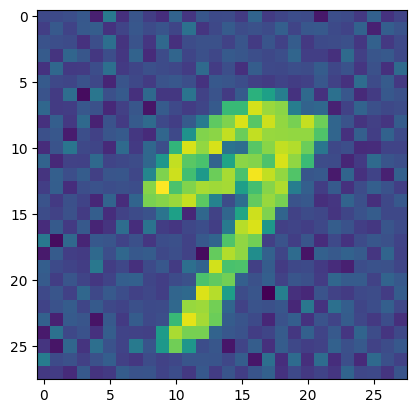

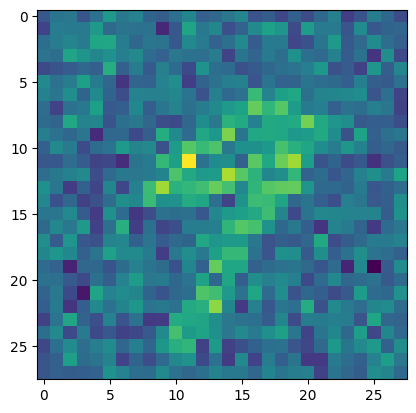

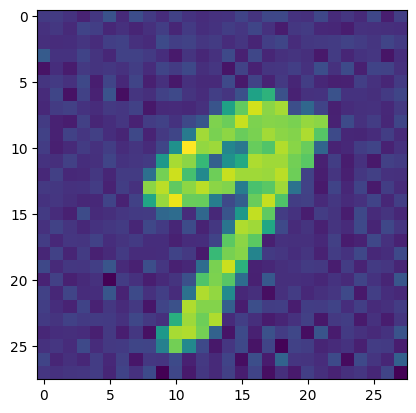

In [92]:
#plt.imshow(test_noisy_images[0,:,:])
l=20
bae = test_noisy_images[l,:,:]
bae2 = np.expand_dims(bae, axis=0)
bae3 = np.expand_dims(bae2,axis=-1)

#taking from the training batch
y_sam = X_train_n[l,:,:,0]
y_sam = np.expand_dims(y_sam,axis=-1)
y_sam = np.expand_dims(y_sam,axis=0)
fin = pred_model1.predict(y_sam)

u_a_g = y_sam[0,:,:,0]
u_a_g = u_a_g.reshape(784)

#learning well

x_sam = u_a_g - fin
mse_x_sam = np.square(np.subtract(u_a_g, fin)).mean()
print(mse_x_sam)
plt.figure()
plt.imshow(x_sam.reshape(28,28))
plt.figure()
plt.imshow(y_sam[0,:,:,0])

fin2 = pred_model1.predict(bae3)
fin3 = fin2.reshape(28,28)
#print('This is the predicted noise',fin)

#comparing predicted noise and actual noise
#print('This is the actual noise', test_noisy_samples[1,:,:])

#testing the difference
#print(fin-test_noisy_samples[0,:,:])
hehe = test_noisy_samples_fin.reshape(k,28,28)
new = test_noisy_images[l,:,:] - fin3
plt.figure()
plt.imshow(new)


